In [6]:
import matplotlib.pyplot as plt

In [7]:
paths = []
with open("input.txt") as f:
    for line in f:
        paths.append(line.strip().split(","))

In [166]:
paths

[['R1002',
  'D715',
  'R356',
  'D749',
  'L255',
  'U433',
  'L558',
  'D840',
  'R933',
  'U14',
  'L285',
  'U220',
  'L88',
  'D477',
  'R36',
  'U798',
  'R373',
  'U378',
  'R305',
  'D341',
  'R959',
  'D604',
  'R717',
  'D911',
  'L224',
  'D32',
  'R481',
  'D508',
  'L203',
  'U445',
  'L856',
  'U44',
  'L518',
  'U909',
  'R580',
  'U565',
  'R484',
  'D170',
  'R356',
  'U614',
  'R278',
  'U120',
  'R540',
  'D330',
  'R124',
  'D555',
  'R890',
  'U445',
  'L876',
  'D948',
  'R956',
  'D503',
  'R391',
  'U564',
  'R624',
  'D642',
  'L821',
  'U924',
  'L921',
  'U869',
  'R104',
  'U376',
  'L693',
  'U812',
  'R758',
  'U200',
  'L515',
  'U435',
  'R505',
  'U22',
  'R707',
  'U926',
  'R261',
  'D332',
  'R535',
  'D704',
  'L561',
  'U476',
  'R225',
  'U168',
  'L784',
  'D794',
  'R311',
  'D426',
  'R813',
  'U584',
  'L831',
  'D258',
  'R241',
  'D665',
  'R550',
  'D709',
  'R261',
  'U557',
  'L670',
  'D823',
  'L297',
  'U951',
  'R634',
  'D647',
  'R6

In [9]:
def get_intersections(path, coords, cross_coords):

    pos = [(0, 0)]
    intersections = []

    def update(steps, update_fn):
        for i in range(steps):
            pos[0] = update_fn(pos[0])
            if pos[0] in cross_coords:
                intersections.append(pos[0])
            coords.add(pos[0])

    for inst in path:
        direction = inst[0]
        steps = int(inst[1:])
        if direction == "R":
            update(steps, lambda p : (p[0] + 1, p[1]))
        if direction == "L":
            update(steps, lambda p : (p[0] - 1, p[1]))
        if direction == "U":
            update(steps, lambda p : (p[0], p[1] + 1))
        if direction == "D":
            update(steps, lambda p : (p[0], p[1] - 1))

    return intersections

In [10]:
coords = set()
cross_coords = set()
get_intersections(paths[0], coords, cross_coords)

[]

In [11]:
coords = set()
cross_coords = set()
get_intersections("R75,D30,R83,U83,L12,D49,R71,U7,L72".split(","), coords, cross_coords)
get_intersections("U62,R66,U55,R34,D71,R55,D58,R83".split(","), cross_coords, coords)

[(146, 46), (155, 11), (155, 4), (158, -12)]

In [12]:
[abs(x) + abs(y) for x,y in _]

[192, 166, 159, 170]

In [13]:
coords = set()
cross_coords = set()
get_intersections("R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51".split(","), coords, cross_coords)
get_intersections("U98,R91,D20,R16,D67,R40,U7,R15,U6,R7".split(","), cross_coords, coords)

[(107, 71), (107, 51), (107, 47), (124, 11), (157, 18)]

In [16]:
coords = set()
cross_coords = set()
get_intersections(paths[0], coords, cross_coords)
intersections = get_intersections(paths[1], cross_coords, coords)
intersections

[(4191, 148),
 (4553, -607),
 (4884, -912),
 (4780, -1239),
 (4537, -1239),
 (3532, -2889),
 (3532, -2826),
 (3495, -1941),
 (3138, -1883),
 (3138, -1371),
 (3595, -1055),
 (2885, -1371),
 (1968, -1279),
 (2755, -1565),
 (2778, -1565),
 (2797, -1371),
 (4191, 118),
 (4629, 205),
 (4629, 405),
 (4434, 485),
 (5480, 1396),
 (5646, 1041),
 (5881, 1041),
 (5881, 987),
 (5646, 987),
 (5646, 1317),
 (5646, 1236),
 (5499, 1396),
 (5646, 1404),
 (6442, 1404),
 (6469, 1257),
 (6899, 780),
 (7277, 780),
 (7284, 845),
 (6899, 969),
 (6467, 1164),
 (6442, 1164),
 (5881, 1164),
 (6106, 1272),
 (6442, 1272)]

In [17]:
min([abs(x) + abs(y) for x,y in intersections])

3247

# Now follows a lot of bullshit ...

In [18]:
def get_intersections(path, coords, cross_coords):

    pos = [(0, 0)]
    intersections = []
    pointsx = []
    pointsy = []

    def update(n, steps, update_fn):
        for i in range(steps):
            n += 1
            pos[0] = update_fn(pos[0])
            pointsx.append(pos[0][0])
            pointsy.append(pos[0][1])
            if pos[0] in coords:
                n = coords[pos[0]]
            if pos[0] in cross_coords:
                intersections.append((pos[0], n, cross_coords[pos[0]]))
            coords[pos[0]] = n
        return n

    n = 0
    for inst in path:
        direction = inst[0]
        steps = int(inst[1:])
        if direction == "R":
            n = update(n, steps, lambda p : (p[0] + 1, p[1]))
        if direction == "L":
            n = update(n, steps, lambda p : (p[0] - 1, p[1]))
        if direction == "U":
            n = update(n, steps, lambda p : (p[0], p[1] + 1))
        if direction == "D":
            n = update(n, steps, lambda p : (p[0], p[1] - 1))

    return intersections, pointsx, pointsy

In [19]:
coords = {}
cross_coords = {}
intersections0, pointsx0, pointsy0 = get_intersections(paths[0], coords, cross_coords)
cross_coords = {}
intersections, pointsx, pointsy = get_intersections(paths[1], cross_coords, coords)
min([a + b for c, a, b in intersections])

26766

In [20]:
import matplotlib.pyplot as plt

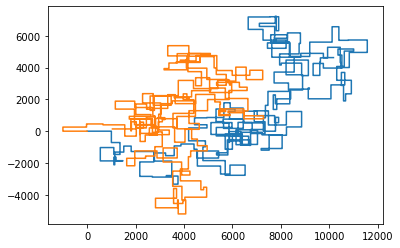

In [21]:
plt.plot(pointsx0, pointsy0)
plt.plot(pointsx, pointsy)

In [22]:
coords = {}
cross_coords = {}
intersections0, pointsx0, pointsy0 = get_intersections("R75,D30,R83,U83,L12,D49,R71,U7,L72".split(","), coords, cross_coords)
cross_coords = {}
intersections, pointsx, pointsy = get_intersections("U62,R66,U55,R34,D71,R55,D58,R83".split(","), cross_coords, coords)
min([a + b for c, a, b in intersections])

610

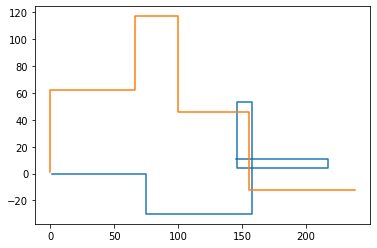

In [23]:
plt.plot(pointsx0, pointsy0)
plt.plot(pointsx, pointsy)

In [24]:
coords = {}
cross_coords = {}
intersections0, pointsx0, pointsy0 = get_intersections("R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51".split(","), coords, cross_coords)
intersections, pointsx, pointsy = get_intersections("U98,R91,D20,R16,D67,R40,U7,R15,U6,R7".split(","), cross_coords, coords)
min([a + b for c, a, b in intersections])

410

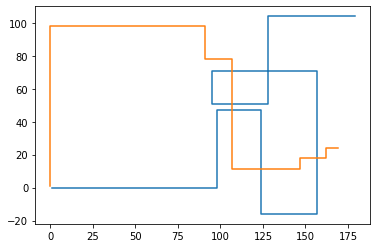

In [25]:
plt.plot(pointsx0, pointsy0)
plt.plot(pointsx, pointsy)

In [36]:
def get_intersections(path, prev_coord_steps):

    pos = [(0, 0)]
    intersections = []
    pointsx = [0]
    pointsy = [0]
    coord_steps = {}

    def update(n, steps, update_fn):
        for i in range(steps):
            n += 1
            pos[0] = update_fn(pos[0])
            pointsx.append(pos[0][0])
            pointsy.append(pos[0][1])
            if pos[0] in coord_steps:
                n = coord_steps[pos[0]]
            coord_steps[pos[0]] = n
            if pos[0] in prev_coord_steps:
                intersections.append((pos[0], n, prev_coord_steps[pos[0]]))
        return n

    n = 0
    for inst in path:
        direction = inst[0]
        steps = int(inst[1:])
        if direction == "R":
            n = update(n, steps, lambda p : (p[0] + 1, p[1]))
        if direction == "L":
            n = update(n, steps, lambda p : (p[0] - 1, p[1]))
        if direction == "U":
            n = update(n, steps, lambda p : (p[0], p[1] + 1))
        if direction == "D":
            n = update(n, steps, lambda p : (p[0], p[1] - 1))

    return coord_steps, intersections, pointsx, pointsy

In [37]:
coord_steps, intersections0, pointsx0, pointsy0 = get_intersections(paths[0], {})
new_coord_steps, intersections, pointsx, pointsy = get_intersections(paths[1], coord_steps)
min([a + b for c, a, b in intersections])

26766

In [38]:
print(intersections)

[((4191, 148), 16197, 12627), ((4553, -607), 17314, 11510), ((4884, -912), 17950, 10874), ((4780, -1239), 18523, 10443), ((4537, -1239), 18766, 8000), ((3532, -2889), 26799, 8955), ((3532, -2826), 26862, 7562), ((3495, -1941), 21392, 6192), ((3138, -1883), 21807, 5777), ((3138, -1371), 22319, 5265), ((3595, -1055), 23092, 6378), ((2885, -1371), 22572, 5012), ((1968, -1279), 23653, 4003), ((2755, -1565), 25010, 12216), ((2778, -1565), 25033, 5099), ((2797, -1371), 25246, 4924), ((4191, 118), 14713, 12597), ((4629, 205), 16752, 13122), ((4629, 405), 16952, 13962), ((4434, 485), 17227, 14237), ((5480, 1396), 16152, 16526), ((5646, 1041), 16673, 16005), ((5881, 1041), 16908, 19434), ((5881, 987), 17010, 19380), ((5646, 987), 17245, 15951), ((5646, 1317), 16397, 16281), ((5646, 1236), 16626, 16200), ((5499, 1396), 16329, 16507), ((5646, 1404), 16484, 16368), ((6442, 1404), 17280, 17932), ((6469, 1257), 17454, 21644), ((6899, 780), 18361, 21357), ((7277, 780), 18739, 20979), ((7284, 845), 18

In [39]:
def plot_and_calc(paths, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    coord_steps, intersections0, pointsx0, pointsy0 = get_intersections(paths[0], {})
    new_coord_steps, intersections, pointsx, pointsy = get_intersections(paths[1], coord_steps)
    ax.plot(pointsx0, pointsy0, "-")
    ax.plot(pointsx, pointsy, "-")
    c, a, b = min(intersections, key=lambda x : x[1] + x[2])
    minab = a + b
    ax.plot(c[0], c[1], "o", markersize=20, alpha=0.5)
    for c, a, b in intersections:
        ax.plot(c[0], c[1], "o", markersize=20, color="gray", alpha=0.3)
        ax.text(c[0], c[1], f"{a + b}")
    #for c in intersections:
    #    print(c)
    #    a, b = intersections[c]
    #    ax.plot(c[0], c[1], "o", markersize=20, color="gray", alpha=0.3)
    #    ax.text(c[0], c[1], f"{a + b}")
    #minab = 0
    return minab, intersections

(6,
 [((1, 1), 2, 4),
  ((1, 2), 3, 3),
  ((1, 3), 4, 6),
  ((0, 2), 8, 2),
  ((0, 1), 9, 1)])

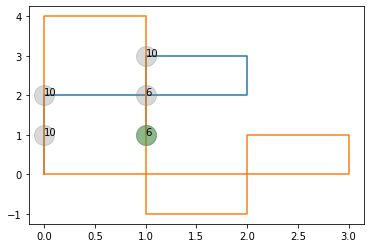

In [40]:
plot_and_calc(
    [
        ["U2", "R2", "U1", "L1", "D2"],
        ["R3", "U1", "L1", "D2", "L1", "U5",
         "L1", "D4"
        ],
    ]
)

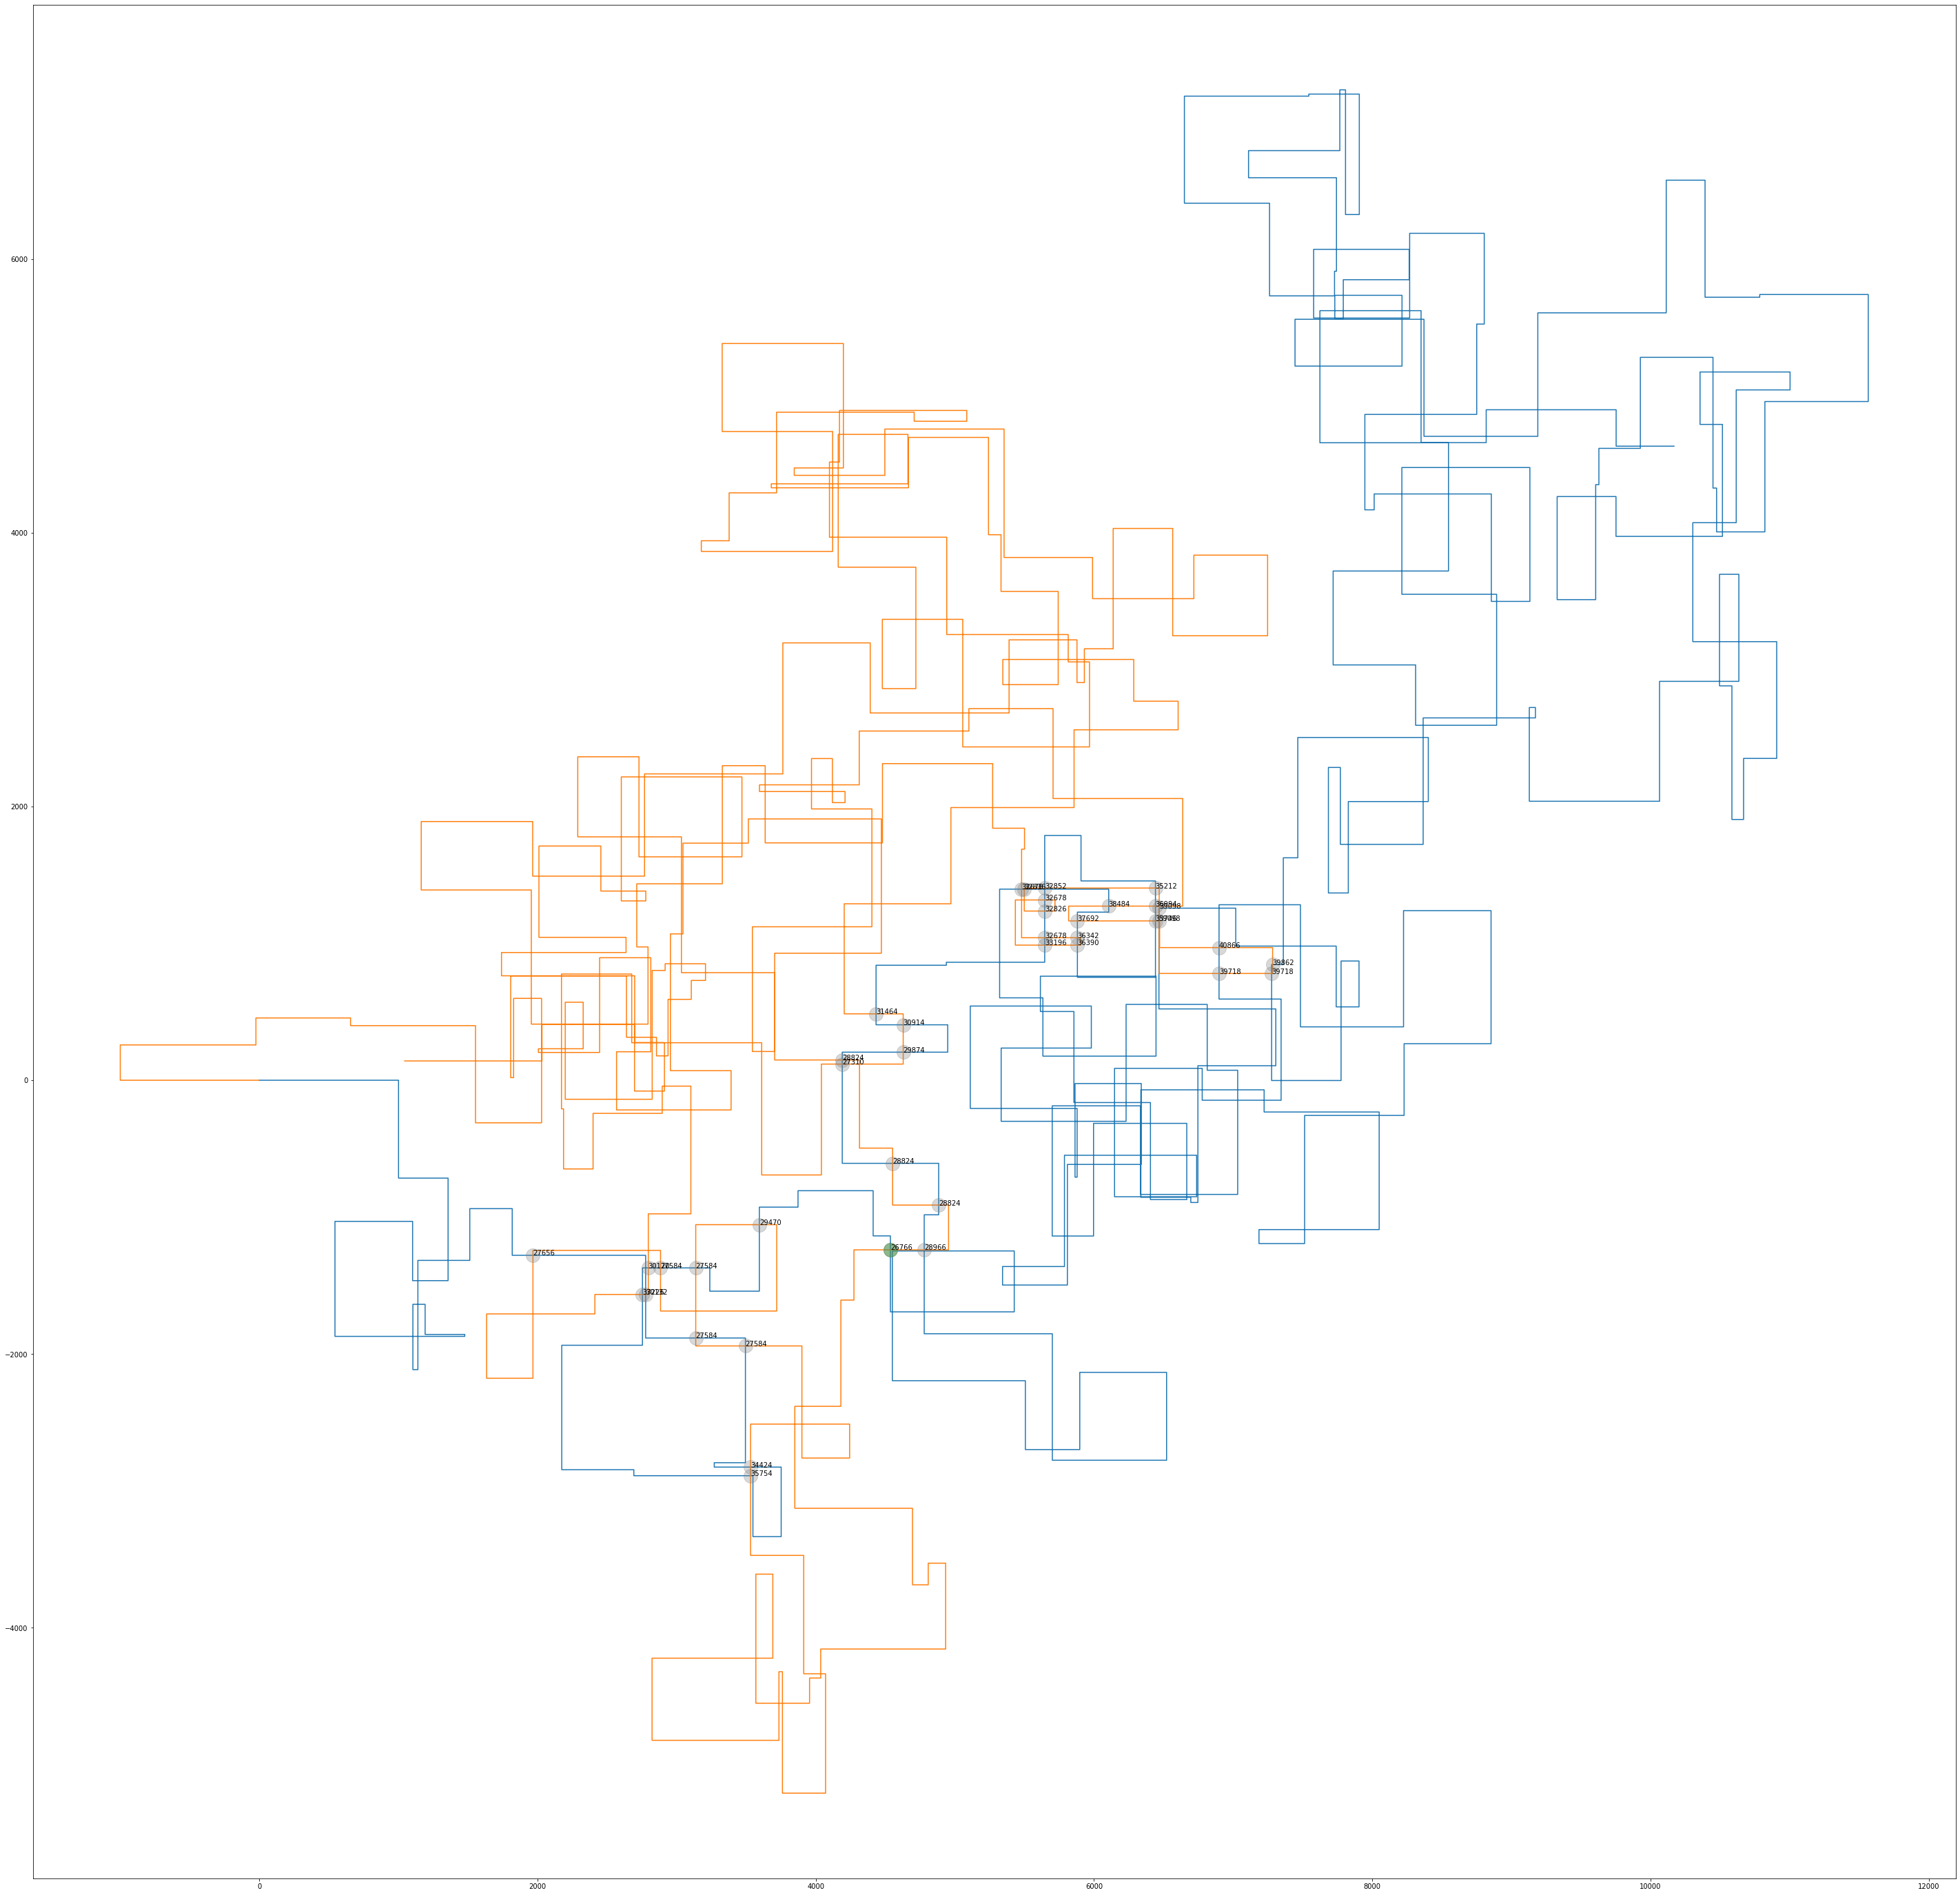

In [41]:
fig, ax = plt.subplots(figsize=(50, 50))
plot_and_calc(paths, ax=ax)
fig.savefig("test.pdf")

In [147]:
def get_intersections_new(path, prev_coord_steps):

    intersections = {}
    pointsx = [0]
    pointsy = [0]
    coord_steps = {}

    def update(pos, n, steps, update_fn, reverse=False):
        for i in range(steps):
            #if reverse:
            #    n -= 1
            #else:
            #    n += 1
            n += 1
            pos = update_fn(pos)
            if pos == (0, 0):
                return pos, n
            
            # for plotting
            pointsx.append(pos[0])
            pointsy.append(pos[1])
    
            if pos in coord_steps and coord_steps[pos] < n:
                # self intersection, take previous value if smaller
                #print(f"Set number to {coord_steps[pos]} at {pos}")
                n = coord_steps[pos]
            else:
                coord_steps[pos] = n
                #print(f"Update {pos} to {n}")
                
            if pos in prev_coord_steps and (not pos in intersections or intersections[pos][0] > n):
                # intersection with previous path -> store number of steps for both paths
                intersections[pos] = (n, prev_coord_steps[pos])

        return pos, n

    n = 0
    pos = (0, 0)
    for inst in path:
        direction = inst[0]
        steps = int(inst[1:])
        if direction == "R":
            pos, n = update(pos, n, steps, lambda p : (p[0] + 1, p[1]))
        if direction == "L":
            pos, n = update(pos, n, steps, lambda p : (p[0] - 1, p[1]))
        if direction == "U":
            pos, n = update(pos, n, steps, lambda p : (p[0], p[1] + 1))
        if direction == "D":
            pos, n = update(pos, n, steps, lambda p : (p[0], p[1] - 1))
    
    # now reverse
    #print(f"reverse! (now at {pos})")
    n = 1000
    for inst in path[::-1]:
        direction = inst[0]
        steps = int(inst[1:])
        if direction == "R":
            pos, n = update(pos, n, steps, lambda p : (p[0] - 1, p[1]), reverse=True)
        if direction == "L":
            pos, n = update(pos, n, steps, lambda p : (p[0] + 1, p[1]), reverse=True)
        if direction == "U":
            pos, n = update(pos, n, steps, lambda p : (p[0], p[1] - 1), reverse=True)
        if direction == "D":
            pos, n = update(pos, n, steps, lambda p : (p[0], p[1] + 1), reverse=True)

    return coord_steps, intersections, pointsx, pointsy

In [148]:
def plot_and_calc_new(paths, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    coord_steps, intersections0, pointsx0, pointsy0 = get_intersections_new(paths[0], {})
    new_coord_steps, intersections, pointsx, pointsy = get_intersections_new(paths[1], coord_steps)
    ax.plot(pointsx0, pointsy0, "-")
    ax.plot(pointsx, pointsy, "-")
    #c, (a, b) = min(intersections.items(), key=lambda x : x[1][1] + x[1][2])
    #minab = a + b
    #ax.plot(c[0], c[1], "o", markersize=20, alpha=0.5)
    #minab = a + b
    minab = 0
    for c, (a, b) in intersections.items():
        ax.plot(c[0], c[1], "o", markersize=20, color="gray", alpha=0.3)
        ax.text(c[0], c[1], f"{a + b}")
    return minab, intersections

In [149]:
#fig, ax = plt.subplots(figsize=(50, 50))
#minab, intersections = plot_and_calc_new(paths, ax=ax)
#fig.savefig("test_new.pdf")

In [150]:
#sorted(intersections.items(), key=lambda x : x[1][0] + x[1][1])

(0,
 {(2, 2): (4, 4),
  (2, 3): (5, 5),
  (1, 3): (4, 4),
  (1, 2): (3, 3),
  (1, 1): (2, 4)})

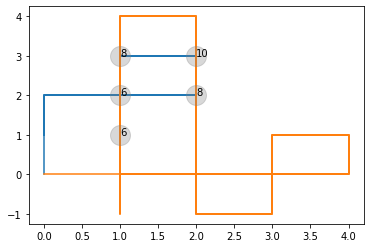

In [151]:
plot_and_calc_new(
    [
        ["U2", "R2", "U1", "L1", "D2"],
        ["R4", "U1", "L1", "D2", "L1", "U5",
         "L1", "D5"
        ],
    ]
)

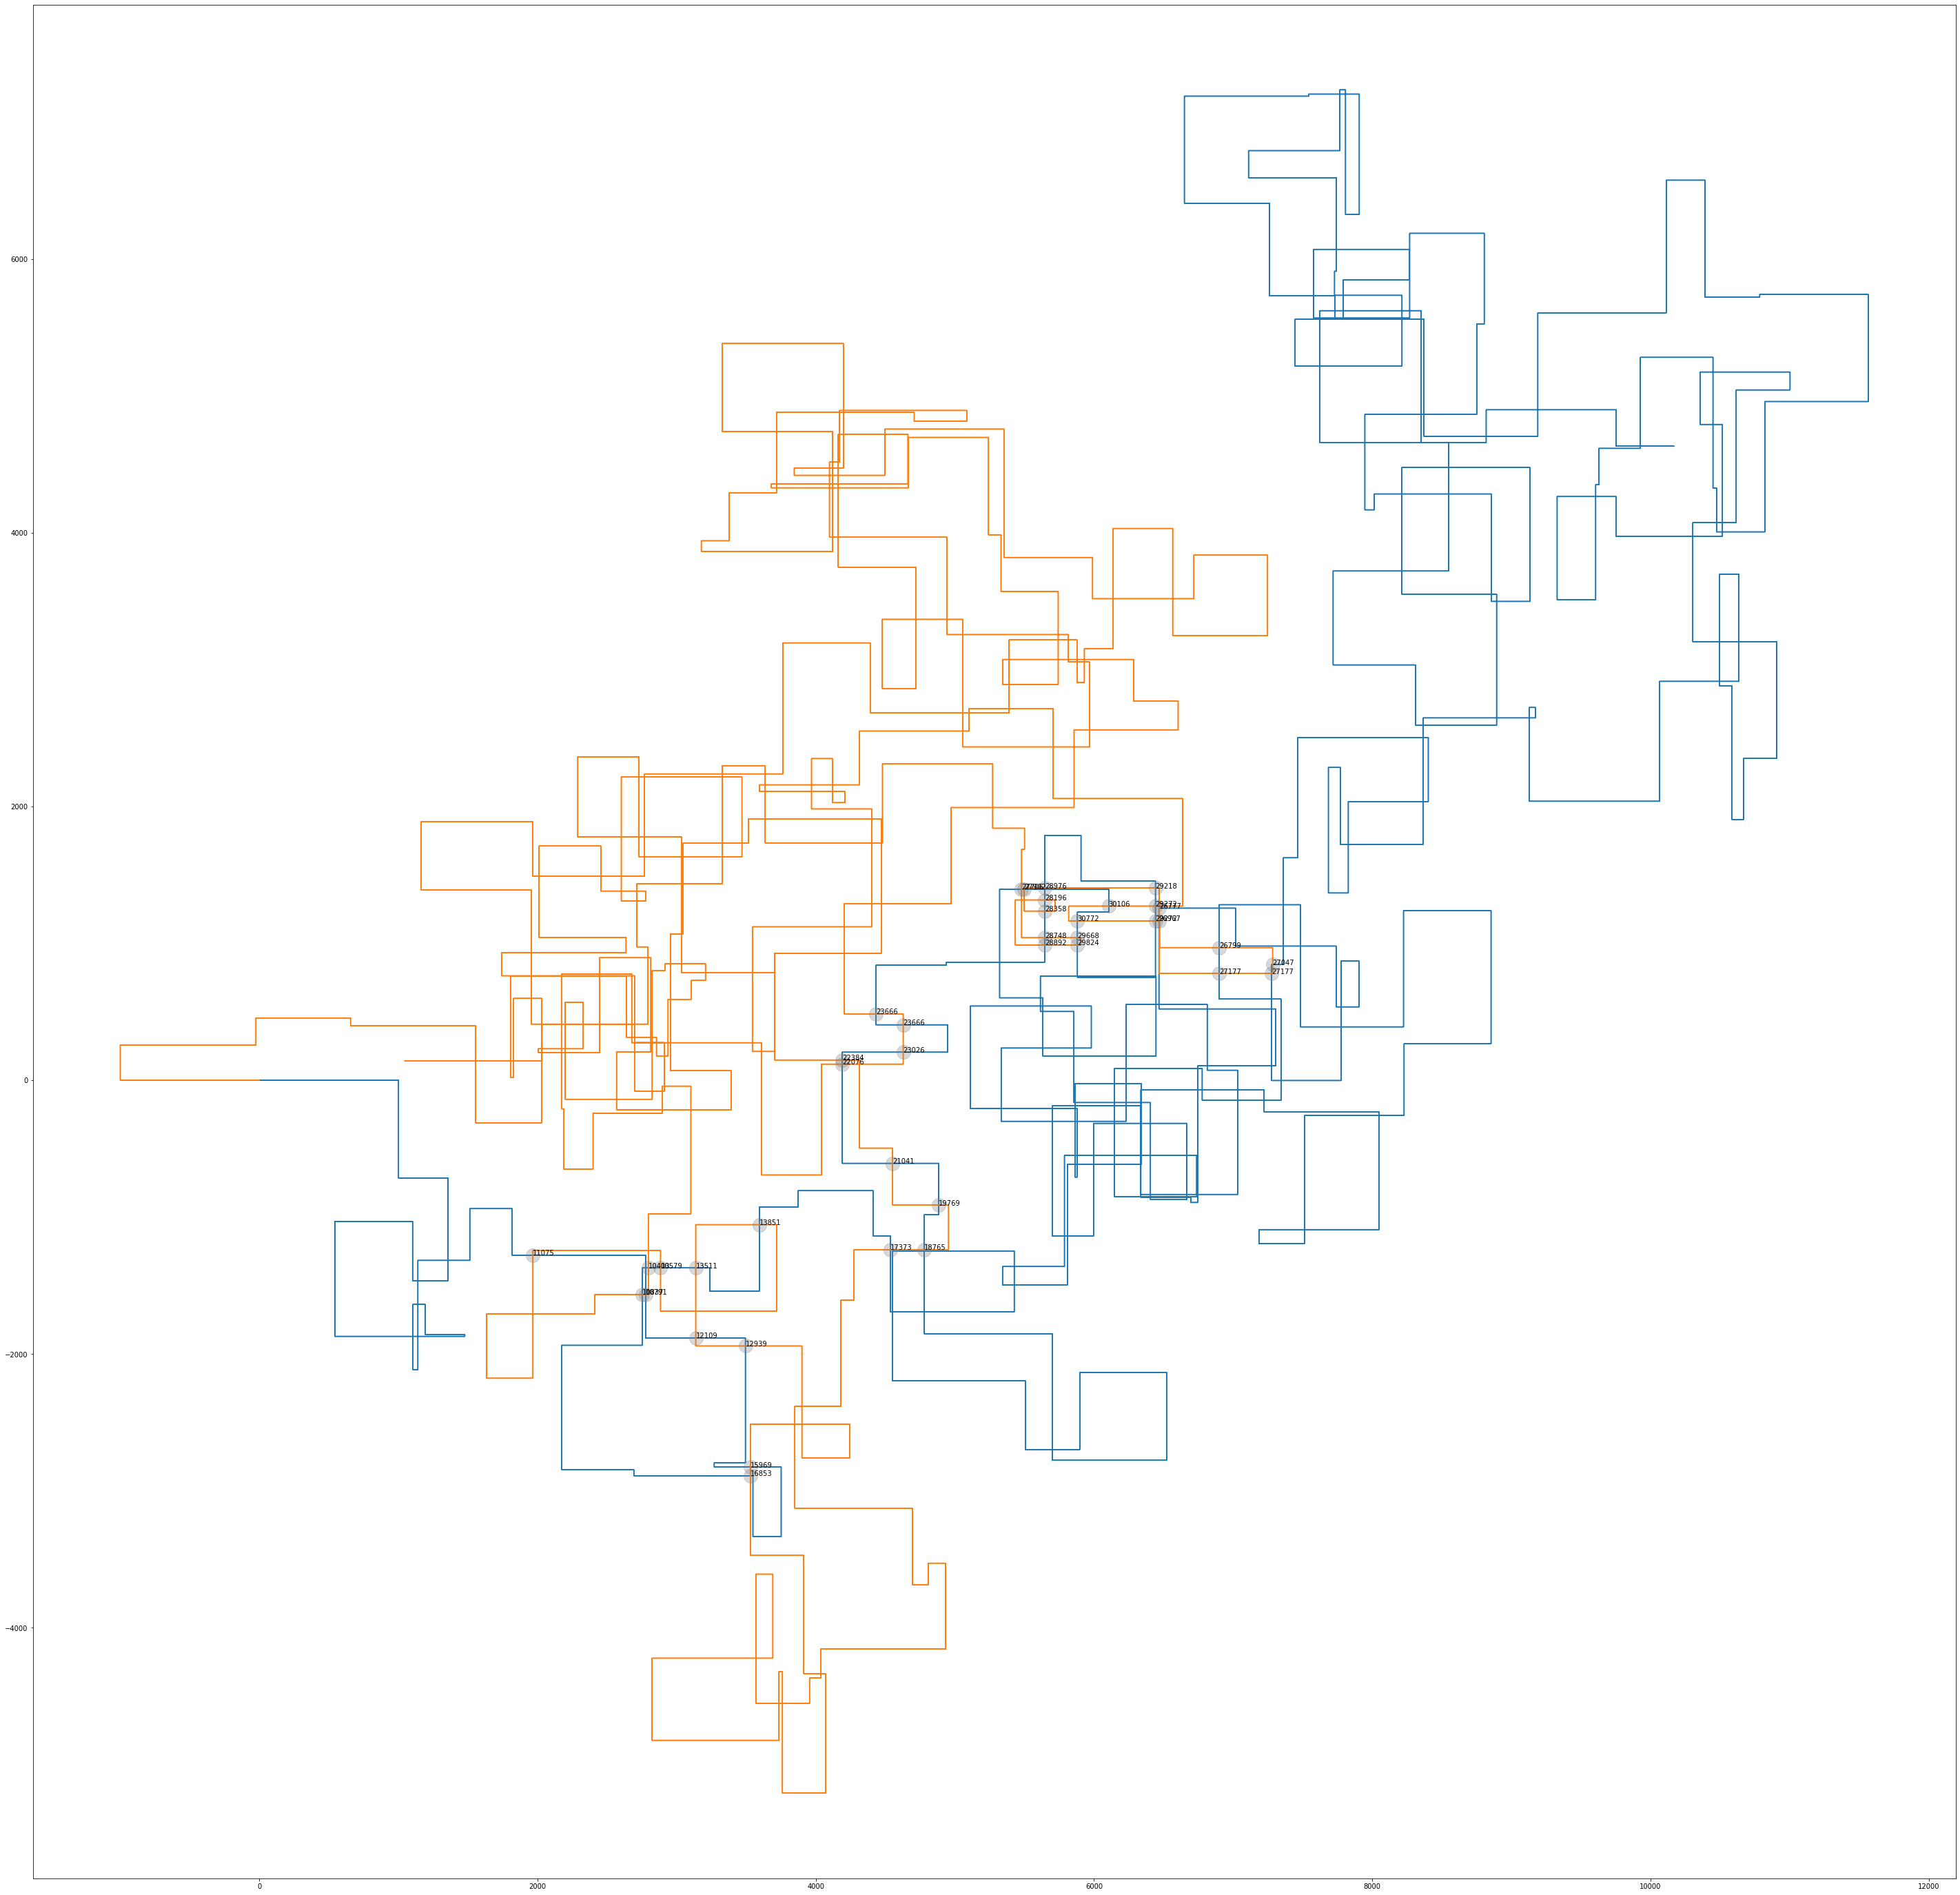

In [152]:
fig, ax = plt.subplots(figsize=(50, 50))
minab, intersections = plot_and_calc_new(paths, ax=ax)
fig.savefig("test_new.pdf")

In [153]:
minab

0

In [156]:
sorted([(c, a, b, a + b) for c, (a, b) in intersections.items()], key=lambda x : x[3])

[((2797, -1371), 5479, 4924, 10403),
 ((2885, -1371), 5567, 5012, 10579),
 ((2778, -1565), 5692, 5099, 10791),
 ((2755, -1565), 5715, 5122, 10837),
 ((1968, -1279), 7072, 4003, 11075),
 ((3138, -1883), 6332, 5777, 12109),
 ((3495, -1941), 6747, 6192, 12939),
 ((3138, -1371), 8246, 5265, 13511),
 ((3595, -1055), 7473, 6378, 13851),
 ((3532, -2826), 8407, 7562, 15969),
 ((3532, -2889), 8470, 8383, 16853),
 ((4537, -1239), 9373, 8000, 17373),
 ((4780, -1239), 9616, 9149, 18765),
 ((4884, -912), 10189, 9580, 19769),
 ((4553, -607), 10825, 10216, 21041),
 ((4191, 118), 10773, 11303, 22076),
 ((4191, 148), 11051, 11333, 22384),
 ((4629, 205), 11198, 11828, 23026),
 ((4629, 405), 10998, 12668, 23666),
 ((4434, 485), 10723, 12943, 23666),
 ((6469, 1257), 14872, 11905, 26777),
 ((6899, 969), 15590, 11209, 26799),
 ((6467, 1164), 14967, 12000, 26967),
 ((7284, 845), 16099, 10948, 27047),
 ((6899, 780), 15779, 11398, 27177),
 ((7277, 780), 16157, 11020, 27177),
 ((5480, 1396), 13570, 14136, 27706

In [157]:
def get_intersections_sep(path, prev_coord_steps):

    intersections = set()
    pointsx = [0]
    pointsy = [0]
    coord_steps = {}

    def update(pos, n, steps, update_fn, reverse=False):
        for i in range(steps):
            #if reverse:
            #    n -= 1
            #else:
            #    n += 1
            n += 1
            pos = update_fn(pos)
            if pos == (0, 0):
                return pos, n
            
            # for plotting
            pointsx.append(pos[0])
            pointsy.append(pos[1])
    
            if pos in coord_steps and coord_steps[pos] < n:
                # self intersection, take previous value if smaller
                #print(f"Set number to {coord_steps[pos]} at {pos}")
                n = coord_steps[pos]
            else:
                coord_steps[pos] = n
                #print(f"Update {pos} to {n}")
                
            if pos in prev_coord_steps:
                # intersection with previous path -> store number of steps for both paths
                #intersections[pos] = (n, prev_coord_steps[pos])
                intersections.add(pos)

        return pos, n

    n = 0
    pos = (0, 0)
    for inst in path:
        direction = inst[0]
        steps = int(inst[1:])
        if direction == "R":
            pos, n = update(pos, n, steps, lambda p : (p[0] + 1, p[1]))
        if direction == "L":
            pos, n = update(pos, n, steps, lambda p : (p[0] - 1, p[1]))
        if direction == "U":
            pos, n = update(pos, n, steps, lambda p : (p[0], p[1] + 1))
        if direction == "D":
            pos, n = update(pos, n, steps, lambda p : (p[0], p[1] - 1))
    
    # now reverse
    #print(f"reverse! (now at {pos})")
    n = 1000
    for inst in path[::-1]:
        direction = inst[0]
        steps = int(inst[1:])
        if direction == "R":
            pos, n = update(pos, n, steps, lambda p : (p[0] - 1, p[1]), reverse=True)
        if direction == "L":
            pos, n = update(pos, n, steps, lambda p : (p[0] + 1, p[1]), reverse=True)
        if direction == "U":
            pos, n = update(pos, n, steps, lambda p : (p[0], p[1] - 1), reverse=True)
        if direction == "D":
            pos, n = update(pos, n, steps, lambda p : (p[0], p[1] + 1), reverse=True)

    return coord_steps, intersections, pointsx, pointsy

In [160]:
coord_steps, intersections0, pointsx0, pointsy0 = get_intersections_sep(paths[0], {})
new_coord_steps, intersections, pointsx, pointsy = get_intersections_sep(paths[1], coord_steps)

In [165]:
sorted([(coord_steps[i], new_coord_steps[i]) for i in intersections], key=lambda x : x[0] + x[1])

[(4924, 5479),
 (5012, 5567),
 (5099, 5692),
 (5122, 5715),
 (4003, 7072),
 (5777, 6332),
 (6192, 6747),
 (5265, 8246),
 (6378, 7473),
 (7562, 8407),
 (8383, 8470),
 (8000, 9373),
 (9149, 9616),
 (9580, 10189),
 (10216, 10825),
 (11303, 10773),
 (11333, 11051),
 (11828, 11198),
 (12668, 10998),
 (12943, 10723),
 (11905, 14872),
 (11209, 15590),
 (12000, 14967),
 (10948, 16099),
 (11020, 16157),
 (11398, 15779),
 (14136, 13570),
 (14155, 13747),
 (14381, 13815),
 (14462, 13896),
 (14657, 14091),
 (14657, 14235),
 (15074, 13902),
 (14520, 14698),
 (14388, 14884),
 (14280, 14992),
 (15342, 14326),
 (15396, 14428),
 (14886, 15220),
 (15219, 15553)]

# Here the actual solution ...
Just use the first length counter at a particular point when hit again, don't reset the point counter to that value!

... also there is no need to go backwards in the path ...

Simply this:

In [211]:
def get_pos_dict(path):

    pos_dict = {}

    def update(pos, n, steps, update_fn):
        for i in range(steps):
            n += 1
            pos = update_fn(pos)
            if not pos in pos_dict:
                pos_dict[pos] = n
        return pos, n

    pos = (0, 0)
    n = 0
    for inst in path:
        direction = inst[0]
        steps = int(inst[1:])
        if direction == "R":
            pos, n = update(pos, n, steps, lambda p : (p[0] + 1, p[1]))
        if direction == "L":
            pos, n = update(pos, n, steps, lambda p : (p[0] - 1, p[1]))
        if direction == "U":
            pos, n = update(pos, n, steps, lambda p : (p[0], p[1] + 1))
        if direction == "D":
            pos, n = update(pos, n, steps, lambda p : (p[0], p[1] - 1))
            
    return pos_dict

In [212]:
d1 = get_pos_dict(paths[0])
d2 = get_pos_dict(paths[1])

In [213]:
sorted([d1[i] + d2[i] for i in (set(d1.keys()) & set(d2.keys()))])

[48054,
 55554,
 56884,
 57026,
 57026,
 58240,
 58240,
 58240,
 58382,
 59524,
 63606,
 64554,
 66440,
 66980,
 70700,
 71172,
 95862,
 96912,
 97952,
 98502,
 160658,
 161176,
 162258,
 162406,
 163036,
 164322,
 164370,
 164772,
 165396,
 167134,
 168328,
 169576,
 170274,
 171066,
 200004,
 201152,
 215880,
 218278,
 221940,
 222084]

In [214]:
d1 = get_pos_dict("R75,D30,R83,U83,L12,D49,R71,U7,L72".split(","))
d2 = get_pos_dict("U62,R66,U55,R34,D71,R55,D58,R83".split(","))
sorted([d1[i] + d2[i] for i in (set(d1.keys()) & set(d2.keys()))])

[610, 624, 726, 850]

In [215]:
d1 = get_pos_dict("R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51".split(","))
d2 = get_pos_dict("U98,R91,D20,R16,D67,R40,U7,R15,U6,R7".split(","))
sorted([d1[i] + d2[i] for i in (set(d1.keys()) & set(d2.keys()))])

[410, 516, 636, 650, 700]